# Python data science handbook

# Pivot Tables

In [129]:
import numpy as np
import pandas as pd
import seaborn as sns

In [130]:
asis = pd.read_csv(r'C:\Users\Mohamad Syafiq\Desktop\AsisPivot.csv')

Import Data Table

In [131]:
asis.head()

,Asset Description,Commision Year,More than 10years,Purchase Cost,Price more 10k,Asset Status,Expected Lifespan (Years),Asset Age (Year),Warranty Duration,Past Expected,Purchase Category,Purchase Status,Purchase Date
0,Mobile X-Ray,2015,0,149541.2,1,Active,7,3.11,12,0,Additional,1,26/10/2015
1,Laser Imager,2015,0,31250.0,1,Active,10,4.00,24,0,Additional,1,02/09/2015
2,Electrosurgical Unit,2015,0,49850.0,1,Active,7,4.60,12,0,Additional,1,26/03/2015
3,Smoke Evacuator,2013,0,29000.0,1,Active,7,6.50,11,0,Additional,1,04/04/2013
4,Laser Photocoagulator,2013,0,149700.0,1,Active,10,6.30,23,0,Additional,1,10/06/2013


Pivot Tables

In [132]:
asis.groupby(' Asset Status')[['More than 10years']].mean()

,More than 10years
Asset Status,
Active,0.379728
Inactive,0.956757


In [133]:
asis.groupby(' Asset Status')[['Past Expected']].mean()

,Past Expected
Asset Status,
Active,0.518636
Inactive,0.989189


In [134]:
Year = pd.cut(asis['Commision Year'], [2000, 2010, 2019])
asis.pivot_table('Price more 10k', [' Asset Status', Year], 'Past Expected')

Past Expected                        0         1
 Asset Status Commision Year                    
Active        (2000, 2010]    0.326923  0.370611
              (2010, 2019]    0.387533  0.517291
Inactive      (2000, 2010]    1.000000  0.218487
              (2010, 2019]    0.333333  0.142857

In [135]:
asis[' Asset Status'].value_counts()

Active      7271
Inactive     370
Name:  Asset Status, dtype: int64

In [136]:
asis['Past Expected'].value_counts()

1    4137
0    3504
Name: Past Expected, dtype: int64

In [137]:
asis['More than 10years'].value_counts()

0    4526
1    3115
Name: More than 10years, dtype: int64

In [138]:
asis.groupby(' Asset Status')[['Price more 10k']].mean()

,Price more 10k
Asset Status,
Active,0.388805
Inactive,0.221622


In [139]:
asis['Yearly'] = 1 *(asis['Commision Year'] // 1)
asis.pivot_table('Purchase Cost', index='Yearly', columns=' Asset Status', aggfunc='sum')

Asset Status,Active,Inactive
Yearly,,
2000,1100.00,16300.00
2001,134350.00,3000.00
2002,18638124.67,4672817.00
2003,4004314.65,1976890.05
2004,12245793.50,565497.00
2005,13419577.00,335363.00
2006,18837814.94,294665.00
2007,15754628.28,140420.00
2008,9233080.97,217835.50


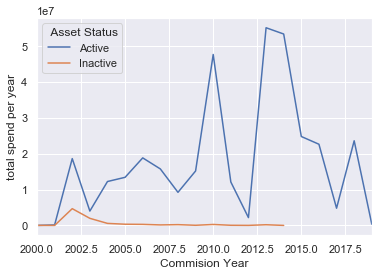

In [140]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
asis.pivot_table('Purchase Cost', index='Commision Year', columns=' Asset Status', aggfunc='sum').plot()
plt.ylabel('total spend per year');

In [141]:
asis['Yearly'] = 1 *(asis['Commision Year'] // 1)
asis.pivot_table('Purchase Cost', index='Yearly', columns='Past Expected', aggfunc='sum')

Past Expected,0,1
Yearly,,
2000,NaN,17400.00
2001,NaN,137350.00
2002,NaN,23310941.67
2003,NaN,5981204.70
2004,103167.00,12708123.50
2005,480900.00,13274040.00
2006,267980.00,18864499.94
2007,675624.00,15219424.28
2008,580129.00,8870787.47


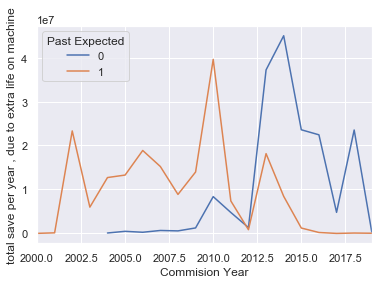

In [142]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
asis.pivot_table('Purchase Cost', index='Commision Year', columns='Past Expected', aggfunc='sum').plot()
plt.ylabel('total save per year , due to extra life on machine');

In [150]:
asis['Past Expected'].value_counts()

1    4137
0    3504
Name: Past Expected, dtype: int64

In [144]:
asis['Yearly'] = 1 *(asis['Commision Year'] // 1)
asis.pivot_table('Purchase Cost', index='Yearly', columns='Purchase Status', aggfunc='sum')

Purchase Status,0,1
Yearly,,
2000,NaN,17400.00
2001,NaN,137350.00
2002,NaN,23310941.67
2003,16000.0,5965204.70
2004,250960.0,12560330.50
2005,4135.0,13750805.00
2006,54500.0,19077979.94
2007,3500.0,15891548.28
2008,NaN,9450916.47


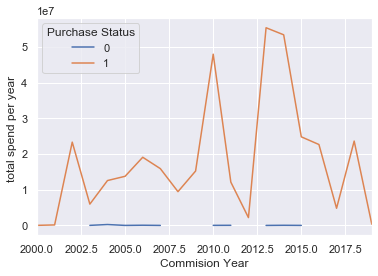

In [145]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
asis.pivot_table('Purchase Cost', index='Commision Year', columns='Purchase Status', aggfunc='sum').plot()
plt.ylabel('total spend per year ');